<a href="https://colab.research.google.com/github/senshi900/SmartCareAI/blob/main/SMART_CARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMART CARE - Tracking & CSV Export Script
# 1. Install ultralytics if not installed:

In [ ]:
!pip install ultralytics opencv-python-headless pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

upload vedio

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving videoplayback.mp4 to videoplayback.mp4


# 2. Set your video filename here:

In [ ]:
# 3. Load YOLOv8 model
model = YOLO("yolov8n.pt")  # You can change to yolov8s.pt for better accuracy

# 4. Run tracking on the video
results = model.track(source=video_file, persist=True, tracker="bytetrack.yaml", save=True)

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 5958/10955) /content/videoplayback.mp4: 384x640 1 person, 167.8ms
video 1/1 (frame 5959/10955) /content/videoplayback.mp4: 384x640 1 person, 173.2ms
video 1/1 (frame 5960/10955) /content/videoplayback.mp4: 384x640 1 person, 192.4ms
video 1/1 (frame 5961/10955) /content/videoplayback.mp4: 384x640 1 person, 166.3ms
video 1/1 (frame 5962/10955) /content/videoplayback.mp4: 384x640 1 person, 172.6ms
video 1/1 (frame 5963/10955) /content/videoplayback.mp4: 384x640 1 person, 428.6ms
video 1/1 (frame 5964/10955) /content/videoplayback.mp4: 384x640 1 person, 224.6ms
video 1/1 (frame 5965/10955) /content/videoplayback.mp4: 384x640 1 person, 260.0ms
video 1/1 (frame 5966/10955) /content/videoplayback.mp4: 384x640 1 person, 276.0ms
video 1/1 (frame 5967/10955) /content/videoplayback.mp4: 384x640 1 person, 247.9ms
video 1/1 (frame 5968/10955) /content/videoplayback.mp4: 384x640 1 person, 254.5ms
video 1/1 (frame 5969/10955) /conten

# 3. Save tracking data to CSV

In [ ]:
import pandas as pd

data = []

for result in results:
    frame_name = result.path
    for box in result.boxes:
        player_id = int(box.id.item()) if box.id is not None else -1
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        conf = box.conf.item()
        data.append([frame_name, player_id, x1, y1, x2, y2, conf])

df = pd.DataFrame(data, columns=["Frame", "Player ID", "X1", "Y1", "X2", "Y2", "Confidence"])
df.to_csv("tracking_output.csv", index=False)

# SMART CARE: Match Player Tracking Analysis

# This notebook includes:
# 1. Health Analysis
# 2. Performance Analysis
# 3. Injury Prediction
# 4. Match Statistics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV tracking data
df = pd.read_csv("tracking_output.csv")

# Preprocess
df["Center X"] = (df["X1"] + df["X2"]) / 2
df["Center Y"] = (df["Y1"] + df["Y2"]) / 2
df = df[df["Player ID"] != -1]  # remove unknowns


# Health Analysis


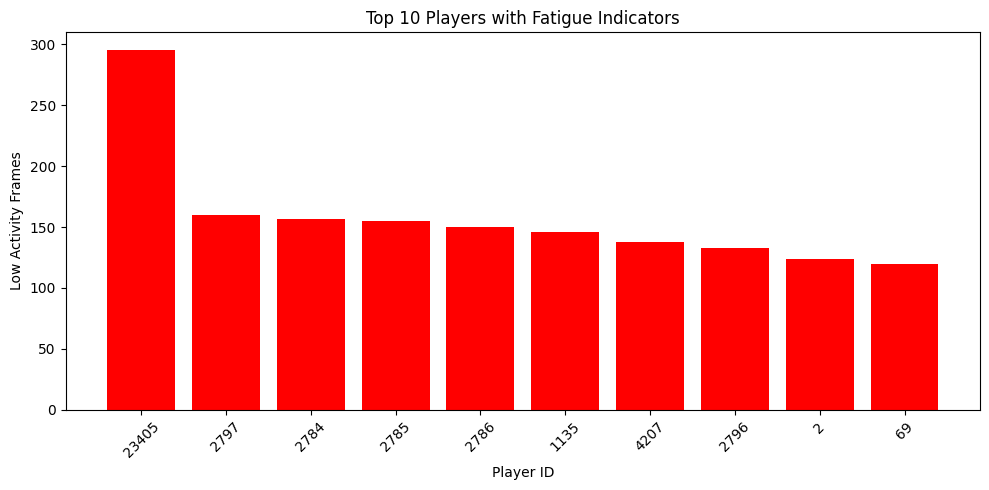

In [ ]:
fatigue_data = []
for player_id in df["Player ID"].unique():
    player_data = df[df["Player ID"] == player_id].sort_values("Frame")
    dx = player_data["Center X"].diff().fillna(0)
    dy = player_data["Center Y"].diff().fillna(0)
    movement = np.sqrt(dx**2 + dy**2)
    low_activity_frames = (movement < 1).sum()
    fatigue_data.append([player_id, movement.sum(), low_activity_frames])

fatigue_df = pd.DataFrame(fatigue_data, columns=["Player ID", "Total Movement", "Low Activity Frames"])
fatigue_df = fatigue_df.sort_values("Low Activity Frames", ascending=False)

# Plot fatigue
top_fatigued = fatigue_df.head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_fatigued["Player ID"].astype(str), top_fatigued["Low Activity Frames"], color='red')
plt.xlabel("Player ID")
plt.ylabel("Low Activity Frames")
plt.title("Top 10 Players with Fatigue Indicators")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Performance Analysis

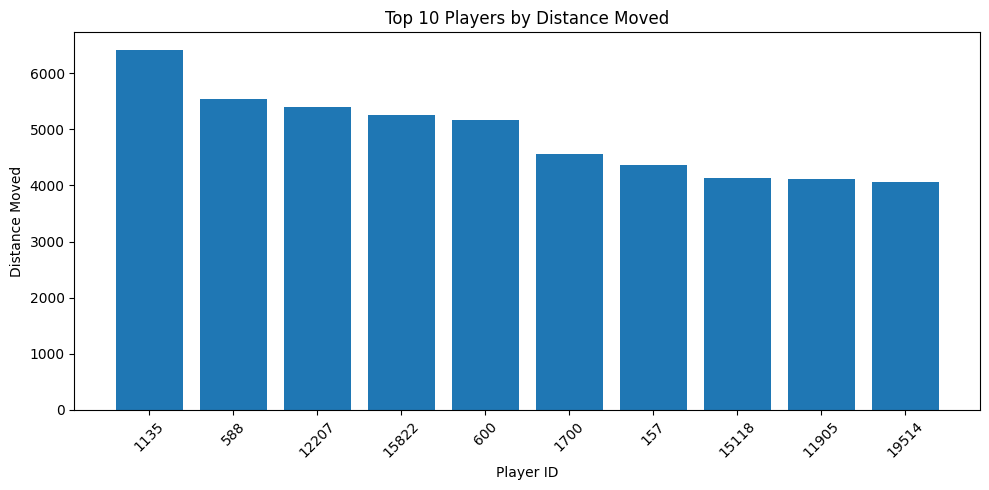

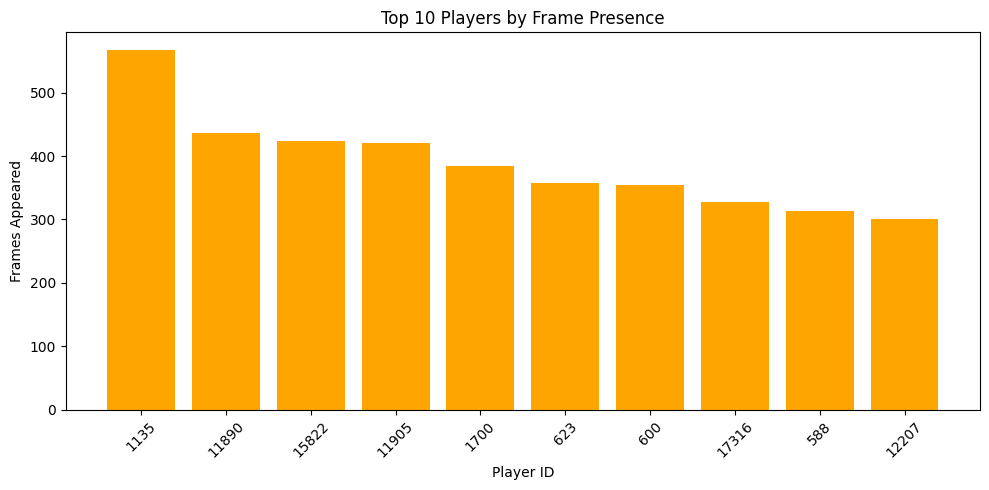

In [ ]:
frame_counts = df["Player ID"].value_counts().reset_index()
frame_counts.columns = ["Player ID", "Frames Appeared"]

distances = {}
for player_id in df["Player ID"].unique():
    player_data = df[df["Player ID"] == player_id].sort_values("Frame")
    dx = player_data["Center X"].diff().fillna(0)
    dy = player_data["Center Y"].diff().fillna(0)
    dist = np.sqrt(dx**2 + dy**2).sum()
    distances[player_id] = dist

distance_df = pd.DataFrame(list(distances.items()), columns=["Player ID", "Distance Moved"])

performance = pd.merge(frame_counts, distance_df, on="Player ID")

# Plot distance
top_distance = performance.sort_values("Distance Moved", ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_distance["Player ID"].astype(str), top_distance["Distance Moved"])
plt.xlabel("Player ID")
plt.ylabel("Distance Moved")
plt.title("Top 10 Players by Distance Moved")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot frames
top_frames = performance.sort_values("Frames Appeared", ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_frames["Player ID"].astype(str), top_frames["Frames Appeared"], color='orange')
plt.xlabel("Player ID")
plt.ylabel("Frames Appeared")
plt.title("Top 10 Players by Frame Presence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Injury Analysis



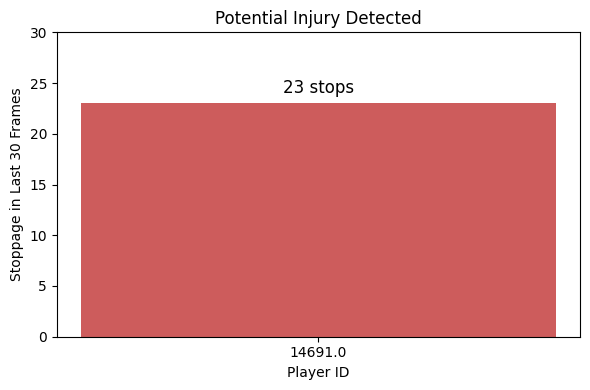

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

injury_suspects = []

for player_id in df["Player ID"].unique():
    player_data = df[df["Player ID"] == player_id].sort_values("Frame")
    dx = player_data["Center X"].diff().fillna(0)
    dy = player_data["Center Y"].diff().fillna(0)
    movement = np.sqrt(dx*2 + dy*2)
    total_movement = movement.sum()
    last_30 = movement[-30:]
    stopped = (last_30 < 1).sum()

    if total_movement > 100 and stopped >= 20:
        injury_suspects.append((player_id, round(total_movement, 2), stopped))

injury_df = pd.DataFrame(injury_suspects, columns=["Player ID", "Total Movement", "Stoppage in Last 30 Frames"])

# إذا فيه بيانات نرسم
if not injury_df.empty:
    player_id = injury_df.iloc[0]["Player ID"]
    stops = injury_df.iloc[0]["Stoppage in Last 30 Frames"]

    plt.figure(figsize=(6, 4))
    plt.bar([str(player_id)], [stops], color='indianred')
    plt.title("Potential Injury Detected")
    plt.xlabel("Player ID")
    plt.ylabel("Stoppage in Last 30 Frames")
    plt.text(0, stops + 1, f"{int(stops)} stops", ha='center', fontsize=12)
    plt.ylim(0, 30)
    plt.tight_layout()
    plt.show()
else:
    print("No injury cases detected.")

#Match Statistics

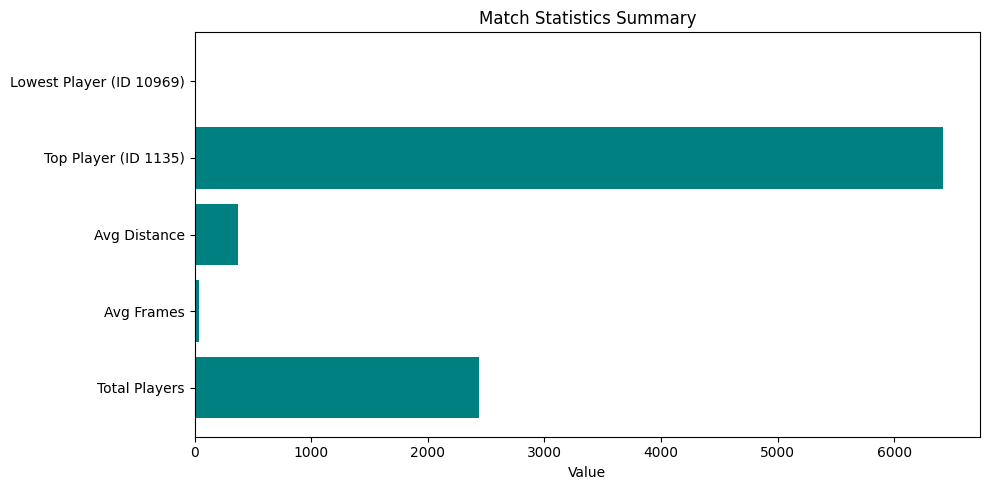

In [ ]:
total_players = df["Player ID"].nunique()
avg_frames = performance["Frames Appeared"].mean()
avg_distance = performance["Distance Moved"].mean()
max_player = performance.loc[performance["Distance Moved"].idxmax()]
min_player = performance.loc[performance["Distance Moved"].idxmin()]

labels = [
    "Total Players",
    "Avg Frames",
    "Avg Distance",
    f"Top Player (ID {int(max_player['Player ID'])})",
    f"Lowest Player (ID {int(min_player['Player ID'])})"
]

values = [
    total_players,
    round(avg_frames, 2),
    round(avg_distance, 2),
    round(max_player["Distance Moved"], 2),
    round(min_player["Distance Moved"], 2)
]

plt.figure(figsize=(10, 5))
plt.barh(labels, values, color='teal')
plt.xlabel("Value")
plt.title("Match Statistics Summary")
plt.tight_layout()
plt.show()
